In [1]:
year=2019
month=9

# Developer Salary in First-Tier Cities 程序员工资调查
我在4月1日到3日之间，抓取了某招聘网站的软件和互联网类招聘数据40万条，其中通过程序判断为程序员的14万条。地域方面，我选择了24个主要城市。不过本文只以一线城市为研究对象。这样是为了和我2017年6月的数据做对比。

提到2017年的文章，现在居然还有很多人，把这篇文章拿出来炒作。对于社会来说，可气的是，他们直接把2017改成2019，就发表了，这不是骗人么？！对于我来说，可气的是，他们转载居然还冒充是原创，是可忍熟不可忍！

In [2]:
import pandas as pd
import sys
sys.path.append('..')
sys.path.append('../py')
sys.path.append('../../py')
import db
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import scipy.stats as stats
import numpy as np
import weighted
%matplotlib inline

In [3]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and city in ('北京','上海','广州','深圳')  and monthly_salary<80000 and YEAR(publish_date)={year} and MONTH(publish_date)={month}  ", con=conn)
conn.close()

In [4]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [5]:
#del data['publish_date']
#del data['published_on_weekend']
#del data['title']
#del data['title']
#del data['company_title']
#del data['company_description']
#del data['job_description']
#del data['job_id']

In [6]:
data=data.sort_values(by='headcount', ascending=False)
data.head()

,job_id,monthly_salary,headcount,title,zhinengleibie,career,real_province,province,city,company_description,...,pl_visual_basic,publish_date,published_on_weekend,tag_baby_care,tag_five_insurance,tag_flexible,tag_no_overtime,tag_rest_one_day,tag_rest_two_days,tag_stock
5920,114568087,3750,151,C#软件开发,软件工程师,一般程序员,None,北京,北京,北京其然科技有限公司，名字源于，顺 其其自 然然，主旨顺其自然、水到渠成。北京其然科技有限公...,...,False,2019-09-02,False,False,False,False,False,False,False,False
1853,108834444,15000,150,Java开发工程师,软件工程师,一般程序员,None,北京,北京,大连华信计算机技术股份有限公司（简称大连华信）是一家面向全球客户提供领先的应用软件产品、信息...,...,False,2019-09-02,False,False,True,False,False,False,False,False
5834,114489048,14000,80,开发工程师,软件工程师,一般程序员,None,北京,北京,长城计算机软件与系统有限公司（简称长城软件）是中国电子信息产业集团有限公司（简称中国电子）计...,...,False,2019-09-02,False,False,True,True,False,False,False,False
8857,50929897,14000,50,软件开发工程师（java）-初级、中级、高级,高级软件工程师,一般程序员,None,广东,深圳,深圳市康拓普信息技术有限公司（shenzhen comtop information tec...,...,False,2019-09-02,False,False,False,False,False,False,False,False
3201,111277959,12500,30,中级JAVA工程师BS方向,软件工程师,一般程序员,None,北京,北京,北京华宇泰聚科技有限公司介绍 北京华宇泰聚科技有限公司成立于2013年3月，注册资金5...,...,False,2019-09-02,False,False,True,False,False,False,False,False


In [7]:
def pd_weighted_mean(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()


# Unilateral Stats 总体统计

有数据可知，程序员向一线城市集中的趋势非常明显。

According to the statistics, significant amount of developers are in the first tier cities.

In [8]:
data.shape

(10622, 94)

In [9]:
data.headcount.sum()

34000

In [10]:
salary_mean=weighted.weighted_mean(data.monthly_salary.values, data.headcount.values)
q=weighted.weighted_quantile(data.monthly_salary.values,[0.025,0.25,0.5,0.75,0.975], data.headcount.values)
q

array([ 5785., 12000., 15000., 20000., 35000.])

In [11]:
print(f'{year}年{month}月中国一线城市程序员的平均工资为{salary_mean:.0f}元，工资中位数为{q[2]:.0f}元，其中95%的人的工资位于{q[0]:.0f}到{q[4]:.0f}元之间。')

2019年9月中国一线城市程序员的平均工资为16376元，工资中位数为15000元，其中95%的人的工资位于5785到35000元之间。


In [12]:
print(f'In {year}, Developers in China earn {salary_mean:.0f} Yuan as average, '
      f'the median is {q[2]:.0f} Yuan, 95% of them earn between {q[0]:.0f} and {q[4]:.0f} Yuan.')

In 2019, Developers in China earn 16376 Yuan as average, the median is 15000 Yuan, 95% of them earn between 5785 and 35000 Yuan.


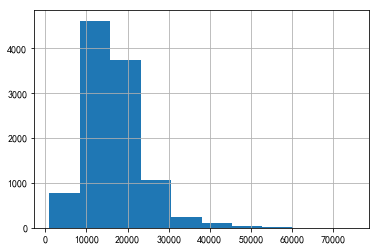

In [13]:
data.monthly_salary.hist()

It does not look like normal distribution.

In [14]:
from scipy import stats

In [15]:
stats.normaltest(data.monthly_salary)

NormaltestResult(statistic=3364.8825997516997, pvalue=0.0)

null hypothesis: x comes from a normal distribution
    
p=0

The null hypothesis can be rejected

conclusion: data is not normally distributed.

Zoom in

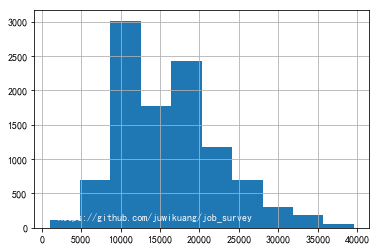

In [16]:
data[data.monthly_salary<40000].monthly_salary.hist()
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0,0), xytext=(2000, 100), color='white')
plt.show()

## Role 角色

In [17]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]
    

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

def get_sub_stats_by_prefix(data, prefix):
    
    features = [feature for feature in data.columns if feature.startswith(prefix)]
    salary_mean=[]
    salary_median=[]
    salary_95_min=[]
    salary_95_max=[]
    count=[]
    
    features_out=[]
    for feature in features:
        #print(feature)
        idata=data[data[feature]==1]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(weighted.weighted_mean(values, weights))
        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_median.append(q[1])
        salary_95_min.append(q[0])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        features_out.append(feature)
    sub_data=pd.DataFrame()
    sub_data['rank']=range(0,len(features_out))
    sub_data[prefix]=[f.replace(prefix,'') for f in features_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_median']=salary_median
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)
    sub_data['rank']=range(1,len(features_out)+1)
    #sub_data=sub_data.reset_index()
    return sub_data

def apply_style(sub_data):
    return sub_data.style.hide_index().format(
    {"salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}","percentage":"{:.2%}"})

In [18]:
data_career = get_sub_stats_by_col(data,'career')
data_career.style.format({"salary_mean":"{:.0f}","salary_median":"{:.0f}","percentage":"{:.2%}"})

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,24695,11496.4,22500,50000,859,2.53%
1,算法工程师,22214,7000,20000,50000,1931,5.68%
0,一般程序员,15789,5500,15000,31250,31154,91.63%
3,爬虫工程师,14039,2403.12,12500,32708.3,51,0.15%
4,生物信息工程师,14000,14000,14000,14000,5,0.01%


In [19]:
np.sum(data.monthly_salary * data.headcount) / data.headcount.sum()

16376.404264705883

In [20]:
data.headcount.sum()

34000

In [21]:
data.headcount.describe()

count    10622.000000
mean         3.200904
std          3.472019
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        151.000000
Name: headcount, dtype: float64

In [22]:
pd.options.display.max_columns=100
data.sort_values(by='headcount', ascending=False).head()

,job_id,monthly_salary,headcount,title,zhinengleibie,career,real_province,province,city,company_description,company_size,company_title,company_type,page_title,ageism,db_Apache_Hive,db_CouchBase,db_CouchDB,db_DB2,db_DynamoDB,db_Elasticsearch,db_FileMaker,db_Firebase,db_Firebird,db_Hbase,db_Informix,db_Ingres,db_MariaDB,db_Memcached,db_MongoDB,db_MySQL,db_Neo4j,db_Netezza,db_Oracle,db_PostgreSQL,db_Redis,db_Riak,db_SAP_HANA,db_SQL_Server,db_SQLite,db_Solr,db_Splunk,db_Sybase,db_Teradata,db_dBase,edu,english,experience,expert_adas,expert_blockchain,expert_embed,expert_expert,expert_gis,_996_yes,_996_no,industry,japanese,job_description,job_summary,job_tags,phone_android,phone_app,phone_iso,pl_c_sharp,pl_cpp,pl_delphi,pl_go,pl_haskell,pl_java,pl_javascript,pl_julia,pl_kotlin,pl_lua,pl_matlab,pl_objective_c,pl_perl,pl_php,pl_python,pl_ruby,pl_rust,pl_scrala,pl_swift,pl_typescript,pl_vba,pl_visual_basic,publish_date,published_on_weekend,tag_baby_care,tag_five_insurance,tag_flexible,tag_no_overtime,tag_rest_one_day,tag_rest_two_days,tag_stock
5920,114568087,3750,151,C#软件开发,软件工程师,一般程序员,None,北京,北京,北京其然科技有限公司，名字源于，顺 其其自 然然，主旨顺其自然、水到渠成。北京其然科技有限公...,50-150,北京其然科技有限公司,民营公司,【北京-海淀区C#软件开发_C#软件开发招聘_北京其然科技有限公司】-前程无忧官方招聘网站,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,大专,False,no,False,False,False,False,False,False,False,computer,False,熟悉面向对象思想熟悉.Net架构体系精通C#开发语言熟悉WinFrom开发熟悉Asp.Net...,北京-海淀区|无工作经验|大专|招151人|09-02发布,,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-09-02,False,False,False,False,False,False,False,False
1853,108834444,15000,150,Java开发工程师,软件工程师,一般程序员,None,北京,北京,大连华信计算机技术股份有限公司（简称大连华信）是一家面向全球客户提供领先的应用软件产品、信息...,5000-10000,大连华信计算机技术股份有限公司,合资,【北京-朝阳区Java开发工程师_Java开发工程师招聘_大连华信计算机技术股份有限公司】-...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,本科,False,5_10,False,False,False,False,False,False,False,computer,False,1、5年以上java开发工作经验。2、有丰富研发经验；深入理解SpringCloud、spr...,北京-朝阳区|5-7年经验|本科|招150人|09-02发布,"五险一金,补充医疗保险,定期体检,年终奖金",False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2019-09-02,False,False,True,False,False,False,False,False
5834,114489048,14000,80,开发工程师,软件工程师,一般程序员,None,北京,北京,长城计算机软件与系统有限公司（简称长城软件）是中国电子信息产业集团有限公司（简称中国电子）计...,500-1000,长城计算机软件与系统有限公司,国企,【北京-海淀区开发工程师_开发工程师招聘_长城计算机软件与系统有限公司】-前程无忧官方招聘网站,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,,False,3_5,False,False,False,False,False,False,False,computer,False,1、按系统设计完成功能模块的代码编写；2、编写模块详细设计文档，和相关技术资料；3、负责对开...,北京-海淀区|3-4年经验|招80人|09-02发布,"五险一金,补充医疗保险,交通补贴,餐饮补贴,绩效奖金,年终奖金,弹性工作,定期体检",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-09-02,False,False,True,True,False,False,False,False
8857,50929897,14000,50,软件开发工程师（java）-初级、中级、高级,高级软件工程师,一般程序员,None,广东,深圳,深圳市康拓普信息技术有限公司（shenzhen comtop information tec...,1000-5000,深圳市康拓普信息技术有限公司,国企,【深圳-南山区软件开发工程师（java）-初级、中级、高级_软件开发工程师（java）-初级...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,本科,False,3_5,False,False,False,False,False,False,False,computer,False,1、本科及以上学历，计算机、软件工程及相关专业；2、两年及以上软件开发经验，有系统分析设计的...,深圳-南山区|3-4年经验|本科|招50人|09-02发布,,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-09-02,False,False,False,False,F

In [23]:
data.headcount.sum()

34000

# 城市

In [24]:
headcount_by_cities = data.groupby(by='city').headcount.sum()

In [25]:
headcount_by_cities


city
上海    14849
北京     8435
广州     5025
深圳     5691
Name: headcount, dtype: int64

([<matplotlib.patches.Wedge at 0x20c8e9674e0>,
 [Text(0.21719056138331205, 1.078345148848921, '上海'),
  Text(-1.0207587977651587, -0.4099408210766866, '北京'),
  Text(0.060242299565178056, -1.0983491545693016, '广州'),
  Text(0.9513889605076022, -0.5521404221973465, '深圳')],
 [Text(0.11846757893635201, 0.5881882630085024, '43.7%'),
  Text(-0.5567775260537229, -0.22360408422364722, '24.8%'),
  Text(0.03285943612646075, -0.5990995388559827, '14.8%'),
  Text(0.5189394330041467, -0.30116750301673445, '16.7%')])

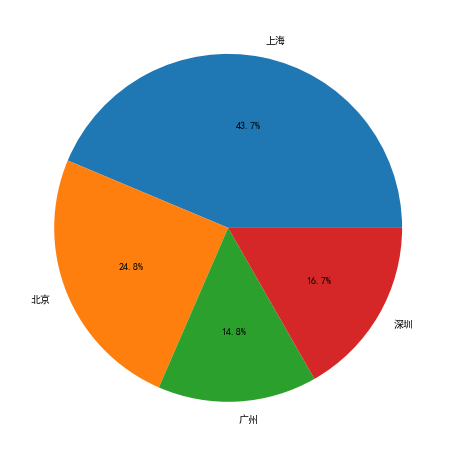

In [26]:
plt.figure(figsize=(10,8))
plt.pie(headcount_by_cities.values, labels=headcount_by_cities.index, autopct='%1.1f%%')

In [27]:
data_pl=get_sub_stats_by_col(data,'city')
apply_style(data_pl)

city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
深圳,18124,8500,17500,35000,5691,16.74%
上海,16478,6000,15000,35000,14849,43.67%
广州,15873,7000,15000,30000,5025,14.78%
北京,15317,3770,14000,35000,8435,24.81%


In [28]:
salary_beijing=data[data.city=='北京'].monthly_salary
salary_shanghai=data[data.city=='上海'].monthly_salary
salary_guangzhou=data[data.city=='广州'].monthly_salary
salary_shenzhen=data[data.city=='深圳'].monthly_salary

In [29]:
stats.f_oneway(salary_beijing, salary_shanghai)

F_onewayResult(statistic=8.285279703443672, pvalue=0.004008943277280999)

In [30]:
stats.f_oneway(salary_shanghai, salary_shenzhen)

F_onewayResult(statistic=49.033317242468236, pvalue=2.7645613257969312e-12)

In [31]:
stats.f_oneway(salary_shenzhen, salary_guangzhou)

F_onewayResult(statistic=143.74309815421827, pvalue=1.6340011131150627e-32)

# 编程语言

In [32]:
data_pl=get_sub_stats_by_prefix(data,'pl_')
apply_style(data_pl)

rank,pl_,salary_mean,salary_median,salary_95_min,salary_95_max,head_count,percentage
1,rust,29863,31935,8500,60000,73,0.15%
2,lua,22336,22500,9075,36708,438,0.88%
3,go,19865,17923,9000,40000,4842,9.71%
4,perl,19737,17500,3750,48521,371,0.74%
5,python,19609,17500,6500,45000,3883,7.79%
6,matlab,19544,17500,4225,60000,474,0.95%
7,kotlin,18961,17500,11500,60000,129,0.26%
8,swift,18938,20000,9000,27500,376,0.75%
9,cpp,18300,17500,6000,40000,7951,15.95%
10,ruby,18048,18000,2500,35297,187,0.38%


数据显示，haskell才是最赚钱的编程语言。python是主流语言里面最赚钱的，比java的工资多了3000元！vb是最不赚钱的了。其中，最赚钱的编程语言和最不赚钱的，工资居然差了2倍。所以，要选好编程语言呀！

# 教育

In [33]:
edu_counts=data[~(data.edu=='')].groupby(by=['edu']).headcount.sum()

In [34]:
edu_counts

edu
初中及以下        3
博士          36
大专        8883
本科       18644
硕士         646
高中          49
Name: headcount, dtype: int64

([<matplotlib.patches.Wedge at 0x20c8de53588>,
 [Text(1.0999999388312116, 0.0003668396529731221, '初中及以下'),
  Text(1.0999880109381792, 0.005135736779506383, '博士'),
  Text(0.5979042787235421, 0.9233149373231655, '大专'),
  Text(-0.6711685070300838, -0.8715118101156223, '本科'),
  Text(1.0962400186488368, -0.09087255643371238, '硕士'),
  Text(1.0999836815467305, -0.005991688484976911, '高中')],
 [Text(0.5999999666352063, 0.0002000943561671575, '0.0%'),
  Text(0.599993460511734, 0.0028013109706398454, '0.1%'),
  Text(0.3261296065764775, 0.5036263294489993, '31.4%'),
  Text(-0.36609191292550025, -0.4753700782448848, '66.0%'),
  Text(0.5979491010811836, -0.049566848963843106, '2.3%'),
  Text(0.5999910990254893, -0.0032681937190783147, '0.2%')])

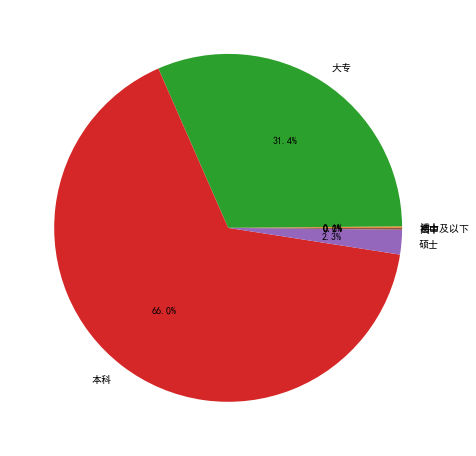

In [35]:
plt.figure(figsize=(10,8))
plt.pie(edu_counts.values, labels=edu_counts.index, autopct='%1.1f%%')

In [36]:
data_edu=get_sub_stats_by_col(data[data.edu.isin(['初中及以下','高中','大专','本科','硕士','博士'])], 'edu')
apply_style(data_edu)

edu,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
博士,27213,11033,22500,60000,36,0.13%
硕士,21025,7000,20000,48238,646,2.29%
本科,17383,6500,16000,35840,18644,65.97%
大专,14578,3750,12500,30000,8883,31.43%
高中,14082,3750,7000,60000,49,0.17%
初中及以下,12500,12500,12500,12500,3,0.01%


In [37]:
salary_associate=data[data.edu=='大专'].monthly_salary
salary_bachelor=data[data.edu=='本科'].monthly_salary
salary_master=data[data.edu=='硕士'].monthly_salary
salary_phd=data[data.edu=='博士'].monthly_salary

In [38]:
print('大专，本科，硕士，博士的平均工资分别是{:.0f}，{:.0f}，{:.0f}，{:.0f}。中位数分别是{:.0f}， {:.0f}，{:.0f}， {:.0f}。'.format(
    salary_associate.mean(),salary_bachelor.mean(),salary_master.mean(),salary_phd.mean(),
    salary_associate.median(),salary_bachelor.median(),salary_master.median(),salary_phd.median()))

大专，本科，硕士，博士的平均工资分别是14997，17651，21161，32657。中位数分别是14000， 17500，20000， 37500。


In [39]:
stats.f_oneway(salary_phd, salary_master)

F_onewayResult(statistic=18.770590847060635, pvalue=2.1397627108513435e-05)

In [40]:
stats.f_oneway(salary_master, salary_bachelor)

F_onewayResult(statistic=48.77591548961803, pvalue=3.1548321494668512e-12)

In [41]:
stats.f_oneway(salary_bachelor, salary_associate)

F_onewayResult(statistic=250.54969332103445, pvalue=1.1557471866168965e-55)

经过Oneway Anova Test，证明从大专到博士，学历每提高一级，工资都有显著的提高。

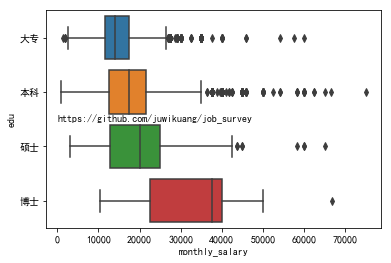

In [42]:

order=['大专','本科','硕士','博士']
a=sns.boxplot(y='edu',x='monthly_salary',order=order,data=data[data.edu.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0.5,1.5), xytext=(2, 1.55))
plt.show()

# 工作经验 Working Experience

In [43]:
data_experience=get_sub_stats_by_col(data, 'experience')
apply_style(data_experience)

experience,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10+,27084,8875,27500,51736,115,0.34%
5_10,21305,11500,20000,40000,5736,16.87%
3_5,17138,9000,15000,34800,10628,31.26%
no,14752,3750,12500,35000,9988,29.38%
1_3,13539,7000,12500,29000,7533,22.16%


In [44]:
salary_we_10=data[data.experience=='10+'].monthly_salary
salary_we_5_10=data[data.experience=='5_10'].monthly_salary
salary_we_3_5=data[data.experience=='3_5'].monthly_salary
salary_we_1_3=data[data.experience=='1_3'].monthly_salary
salary_we_no=data[data.experience=='no'].monthly_salary

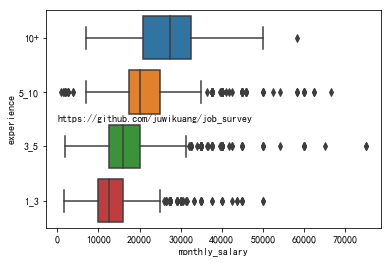

In [45]:

order=['10+','5_10','3_5','1_3']
sns.boxplot(y='experience',x='monthly_salary',order=order,data=data[data.experience.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(1.5,1.5), xytext=(1.55, 1.55))
plt.show()

# 公司 Company

## 公司性质 Company Type

In [46]:
data_company_type=get_sub_stats_by_col(data,'company_type')
apply_style(data_company_type)

company_type,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
外资（欧美）,20495,7000,18450,45033,1852,5.45%
外企代表处,17375,12500,17000,21000,4,0.01%
民营公司,16242,5331,15000,35000,24677,72.58%
外资（非欧美）,16112,7000,15000,30000,1910,5.62%
合资,15949,7000,15000,31250,3604,10.60%
国企,15308,5250,14000,30000,1842,5.42%
事业单位,14592,6500,13583,22875,94,0.28%
非营利组织,8882,5250,6833,17500,17,0.05%


us_eu是欧美外企，startup是创业公司，listed是上市公司，state是国企，private是私企，foreign是非欧美外企，其他不足1000个样本的不管了。

## 公司规模 Company Size

In [47]:
data_company_size=get_sub_stats_by_col(data,'company_size')
apply_style(data_company_size)

company_size,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10000+,19900,5250,17500,48050,818,2.41%
1000-5000,18838,7000,17500,40000,3801,11.18%
500-1000,18043,7000,17000,40000,3631,10.68%
150-500,16198,7000,15000,35000,9408,27.67%
5000-10000,15864,7000,15000,30000,747,2.20%
50-150,15721,4072,15000,30000,11152,32.80%
50-,14947,5462,13000,32500,3969,11.67%
,9527,7000,7000,27500,474,1.39%


公司越大，工资越高

## 行业 Industry

In [48]:
data_industry=get_sub_stats_by_col(data,'industry')
apply_style(data_industry)

industry,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
service,19097,7000,17500,32992,261,0.77%
finance,18167,5250,17500,35000,1296,3.81%
ads,16968,6129,15000,50000,273,0.80%
computer,16521,5406,15000,35000,25298,74.41%
trade,16362,6000,15000,30750,1742,5.12%
logistic,15592,7804,14583,29374,406,1.19%
realestate,15556,7000,13667,29531,445,1.31%
energy,15544,2450,15000,31750,359,1.06%
gov,15357,7000,15000,28458,431,1.27%
medical,14984,7000,14000,27500,660,1.94%
